## Poisson observations with Gamma prior on the mean parameter
In this tutorial we are dealing with data from a Poisson distribution
$$
P(Y=k;\theta) = \frac{e^{-\theta} \theta^k}{k}
$$

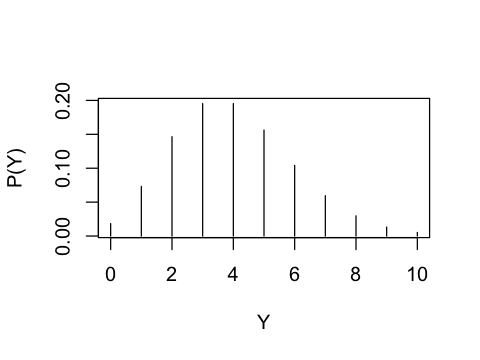

In [70]:
theta_example = 4
plot(0:10, 
     dpois(0:10, theta_example),
     type = 'h',
     xlab='Y',
     ylab='P(Y)'
    )

###
the prior is a Gamma prior
$$
\Gamma(\alpha = 10, \beta = 1)
$$

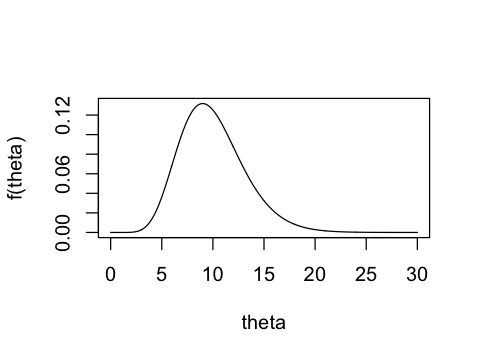

In [31]:
alpha = 10
beta  = 1

options(repr.plot.width=4, repr.plot.height=3) #adjust figure size for 
thetas <- seq(0,30, length=1001)
plot(thetas, dgamma(thetas, alpha, beta),
     type = 'l',
     xlab='theta', 
     ylab='f(theta)')

#### to examin the quantiles

In [32]:
a = qgamma(0.025, alpha, beta)
b = qgamma(0.975, alpha, beta)
print(paste("[", round(a,2), " ,", round(b,2) ,"]", sep=""))

[1] "[4.8 ,17.08]"


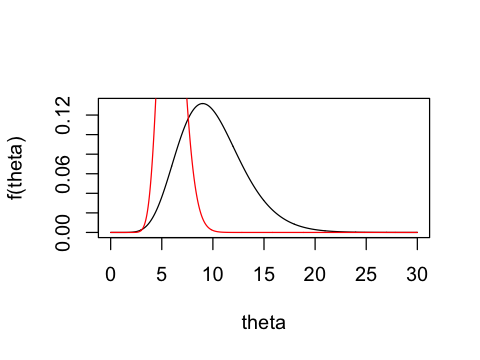

In [33]:
plot(thetas, dgamma(thetas, alpha, beta),
     type = 'l',
     xlab='theta', 
     ylab='f(theta)')
y = 20
alpha_post = alpha + y
beta_post  = beta + 4
lines(thetas, dgamma(thetas, alpha_post, beta_post), col='red')

#### updates quantiles

In [34]:
a_post = qgamma(0.025, alpha_post, beta_post)
b_post = qgamma(0.975, alpha_post, beta_post)
print(paste("[", round(a_post,2), " ,", round(b_post,2) ,"]", sep=""))

[1] "[4.05 ,8.33]"


## Monte carlo and computing probabilites

In [89]:
P10 = 1 - pgamma(10, alpha, beta)
print(P10)

[1] 0.4579297


[1] 0.9673


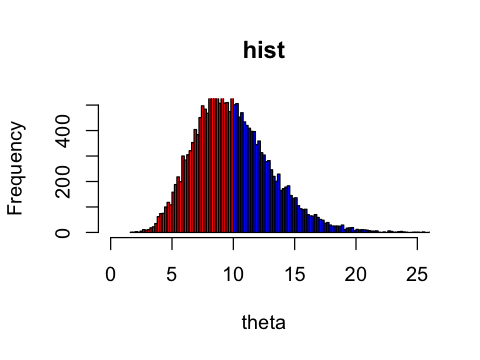

In [98]:
# the monte carlo way
sim    = 20000
thetas = rgamma(sim, alpha, beta)
print(mean(thetas>5))

p1 <- hist(thetas[thetas <= 10], 50, plot = F)                    
p2 <- hist(thetas[thetas >  10], 100, plot = F)   
plot( p2, col='blue', xlim=c(0,25), xlab='theta', main='hist')  # second
plot( p1, col='red',  add=T)  # first histogram



In [67]:
# for the predictivt distribution
Ys = rpois(n = sim, thetas)
print(mean(Ys>13))

[1] 0.2054


In [66]:
thetas_post = rgamma(sim, alpha_post, beta_post)
Ys_post = rpois(n = sim, thetas_post)
print(mean(Ys_post>13))

[1] 0.0082


## Normal data with Uniform prior on the mean
In this tutorial we are dealing with data we assume coming from a normal distribution
$$
f(y;\theta,\sigma^2) = e^{-\frac{(y-\theta)^2}{2\sigma^2}} 
$$
We assume $\sigma^2 = 102$, and unifrom (improper) prior on $\mu$:
$$
f(\mu) \propto 1.
$$

In [54]:
sigma2 = 102
library(NHANES)
# the data contains NA (not a number which is annoying so lets remove them also)
index <- ( NHANES$Age > 20 ) & ( is.na(NHANES[,'Height'])==0 ) 
data <- NHANES[index, c( "Height")] # now removed all data that has NA for either Weight or Height
ybar = mean(data)
n    = length(data)

In [59]:
thetas <- seq(166,175, length=1000)

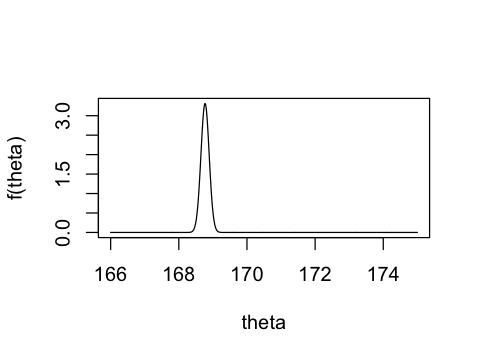

In [62]:

plot(thetas, 
     dnorm(thetas, mean  = ybar, sd = sqrt(sigma2/n)),
     type='l',
     xlab = 'theta',
     ylab = 'f(theta)')